# Random numbers

Generations of (pseudo)random numbers is an important topic which we need to study. In particular, a choice of a ''random prime'' number is essential in many cryptographic protocols. A random choice of a key makes the system secure and prevents the easy decoding of the cryptogram by the opponent.

## Uniform distribution numbers
The most important aspect of random numbers generation is a generation of uniform distributions. Further, based on such distributions one can be able to generate numbers with other distributions.

### Linear congruences method
[Donald Knuth, Art of Programming, Vol. 2, 3.2.1]

One of the simplest method of generating long sequnces of pseudorandom numbers is via linear congruences.

Select four integers:
 * $m$ modulus, $0<m$
 * $a$ multiplier, $0\leq a<m$
 * $c$ step, $0\leq c<m$
 * $X_0$ initial value, $0\leq X_0<m$
 
We generate a sequence $\mathcal{X}=(X_n)_n$ such that
$$X_{n+1} = (a X_n+c)\textrm{ mod }m$$


Remarks:

 - some choices of tuples $(m,a,c,X_0)$ are not always ''sufficiently random''
 - every sequence $\mathcal{X}$ enters into a loop, i.e. there exists an index $M$ such that for $n>M$ the elements $X_n$ are periodic
 - choice of $c=0$ makes the computation faster and for a careful choice of other parameters the sequence can still be sufficiently random
 - choice $a=1$ never produces a random sequence

In [2]:
#generate expression (aX+c) mod m
def axcm(m,a,c,X):
    return (((a*X) % m)+c) % m

#generate terms X_0,...X_(n-1) of the linear recurrence
def lingen(m,a,c,X0,n):
    li=[X0]
    X=X0
    for i in range(1,n):
        X=axcm(m,a,c,X)
        li+=[X]
    return li

In [3]:
#Example 1
#Notice that this sequence is clearly periodic with period of length 4 (prove it!)
lingen(10,7,7,7,10)

[7, 6, 9, 0, 7, 6, 9, 0, 7, 6]

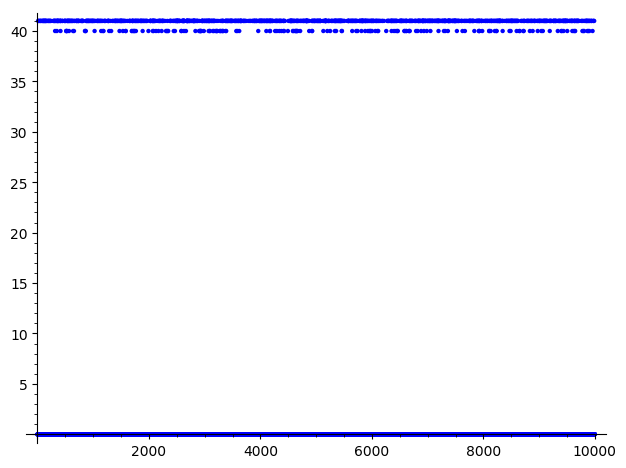

In [4]:
li=lingen(10001,5,4,11,50000)
list_plot([li.count(k) for k in [0..10000]])
#which numbers are missing?

Maximum period of the sequence $\mathcal{X}=(X_n)$ determined by $(m,a,c,X_0)$ is of course m. The following theorem characterizes the situations when the period equals m.

**Theorem([Donald Knuth, Art of Programming, Vol. 2, 3.2.1.2 Theorem A]):**
Linear congruence sequence $\mathcal{X}$ determined by $(m,a,c,X_0)$ has period of length m if and only if:

 - $c$ is coprime with $m$
 - $b=a-1$ is a multiple of $p$ for every prime $p$ dividing $m$
 - $b$ is a multiple of $4$ if $m$ is a multiple of $4$
 
Remark:
Not every choice of the tuple $(m,a,c,X_0)$ which generates a sequence of period $m$ will be random. In particular, $a=c=1$ generates a sequence where $X_{n+1}-X_n\equiv 1 \textrm{ mod } m $


In [1]:
def IsMaximal(m,a,c):
    d=gcd(m,c)
    if d> 1:
        return False
    b=a-1
    prli=m.prime_factors() #SAGE command
    for p in prli:
        if (b % p)!=0:
            return False
    if (m % 4 == 0):
        if not(b % 4 ==0):
            return False
    return True
    

In [79]:
print(IsMaximal(11,2,7))
print(lingen(11,2,7,0,11))

False
[0, 7, 10, 5, 6, 8, 1, 9, 3, 2, 0]


In [33]:
print(IsMaximal(101,3,17))
li1=lingen(101,3,17,0,100)
li1.sort()
print(li1)

False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


Exercise: Why element $4$ is missing from the sequence generated by $(11,2,7,0)$?

Why element $42$ is missing when we choose the tuple$(101,3,17,0)$?

Hint: What are the fixed points of the sequence? Find all $X$ such that $aX+c\equiv X\textrm{ mod }m$

$(a-1)X+c\equiv 0\textrm{ mod }m$

$(a-1)X\equiv -c\textrm{ mod }m$

If $(a-1)$ inverse exists, then we have a unique solution

$X\equiv -c\cdot (a-1)^{-1}\textrm{ mod }m$

In [34]:
print(IsMaximal(101,102,20))

True


In [38]:
li2=lingen(101,102,20,0,101)
li2.sort()
print(li2)==range(0,101)

True


In [92]:
1000003.is_prime() #SAGE function

True

In [39]:
print(IsMaximal(1000003,1000003+1,3378883))
li3=lingen(1000003,1000003+1,3378883,0,100000)

True


In [120]:
li3red=[x % 10 for x in li3]
[li3red.count(k) for k in [0..9]] #by reducing modulo 10 we obtain a very good uniform distribution of elements

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [123]:
li3red[1:10]

[3, 6, 9, 2, 5, 8, 1, 4, 7]

In [29]:
li3[::87]

[0,
 961768,
 923533,
 885298,
 847063,
 808828,
 770593,
 732358,
 694123,
 655888,
 617653,
 579418,
 541183,
 502948,
 464713,
 426478,
 388243,
 350008,
 311773,
 273538,
 235303,
 197068,
 158833,
 120598,
 82363,
 44128,
 5893,
 967661,
 929426,
 891191,
 852956,
 814721,
 776486,
 738251,
 700016,
 661781,
 623546,
 585311,
 547076,
 508841,
 470606,
 432371,
 394136,
 355901,
 317666,
 279431,
 241196,
 202961,
 164726,
 126491,
 88256,
 50021,
 11786,
 973554,
 935319,
 897084,
 858849,
 820614,
 782379,
 744144,
 705909,
 667674,
 629439,
 591204,
 552969,
 514734,
 476499,
 438264,
 400029,
 361794,
 323559,
 285324,
 247089,
 208854,
 170619,
 132384,
 94149,
 55914,
 17679,
 979447,
 941212,
 902977,
 864742,
 826507,
 788272,
 750037,
 711802,
 673567,
 635332,
 597097,
 558862,
 520627,
 482392,
 444157,
 405922,
 367687,
 329452,
 291217,
 252982,
 214747,
 176512,
 138277,
 100042,
 61807,
 23572,
 985340,
 947105,
 908870,
 870635,
 832400,
 794165,
 755930,
 717695,


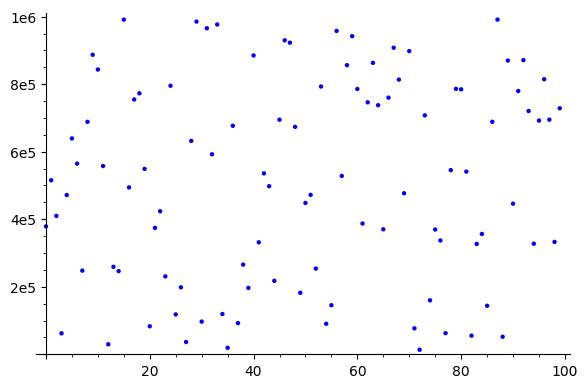

In [44]:
list_plot([li3[(n**2)] for n in [1..100]])